# Summary Comparison with Quartile Band for Privacy and Model Update

## Data format
### Statistical data
* mean = 3
* median = 4
* variance = 5
* lower quartile = 6
* higher quartile = 7
* 10% = 8
* 20% = 9
* 30% = 10
* 40% = 11
* 60% = 12
* 70% = 13
* 80% = 14
* 90% = 15

### Measurement location
Variable: measureSelect
* 2 = configuration time
* 3 = model update
* 4 = reaction time
* 5 = privacy update
* 6 = total processing

* 1 = data/time value for the measurement

In [11]:
size=c()
median=c()
ql=c()
qh=c()

measureSelect <- 5

for (loop in c(1,2,3,4,5,6,7,8,9,
                     10,11,12,13,14,15,16,17,18,19,
                     20,30,40,50,60,70,80,90,95,
                     100,110,120,130,140,150,
                     200,300,400,
                     500,550,560,570,580,590,
                     600,
                     700,710,720,730,740,750,
                     800,
                     900,950,960,970,980,990,
                     1000,1010,1020,1030,1040,1050,
                     2000,3000,4000,5000,6000,7000,8000,9000,
                     10000)) {
    measurementFile <- sprintf("data/summary/simulated-account-services-%05d.csv", loop)
    if (file.exists(measurementFile)) {
        if (file.size(measurementFile) > 0) {
            print(sprintf("Reading %s ...", measurementFile))
            input <- read.csv(measurementFile)
            size <- c(size,loop)
            median <- c(median, input[measureSelect,4])
            ql <- c(ql, input[measureSelect,6])
            qh <- c(qh, input[measureSelect,7])
        } else {
            print(sprintf("File %s is empty.", measurementFile))
        }
    }    
}

data <- data.frame("index"=size,
    "median"=median,
    "ql"=ql,
    "qh"=qh,      
    stringsAsFactors=FALSE) 

print(data)

[1] "Reading data/summary/simulated-account-services-00001.csv ..."
[1] "Reading data/summary/simulated-account-services-00002.csv ..."
[1] "Reading data/summary/simulated-account-services-00003.csv ..."
[1] "Reading data/summary/simulated-account-services-00004.csv ..."
[1] "Reading data/summary/simulated-account-services-00005.csv ..."
[1] "Reading data/summary/simulated-account-services-00006.csv ..."
[1] "Reading data/summary/simulated-account-services-00007.csv ..."
[1] "Reading data/summary/simulated-account-services-00008.csv ..."
[1] "Reading data/summary/simulated-account-services-00009.csv ..."
[1] "Reading data/summary/simulated-account-services-00010.csv ..."
[1] "Reading data/summary/simulated-account-services-00011.csv ..."
[1] "Reading data/summary/simulated-account-services-00012.csv ..."
[1] "Reading data/summary/simulated-account-services-00013.csv ..."
[1] "Reading data/summary/simulated-account-services-00014.csv ..."
[1] "Reading data/summary/simulated-account-serv

## Setting up the graph

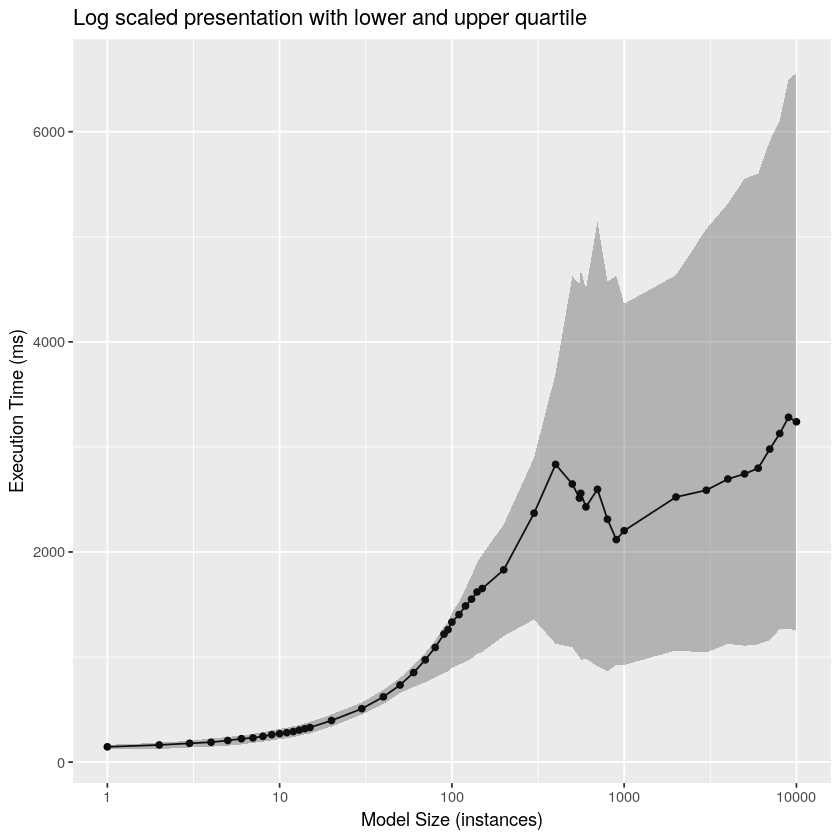

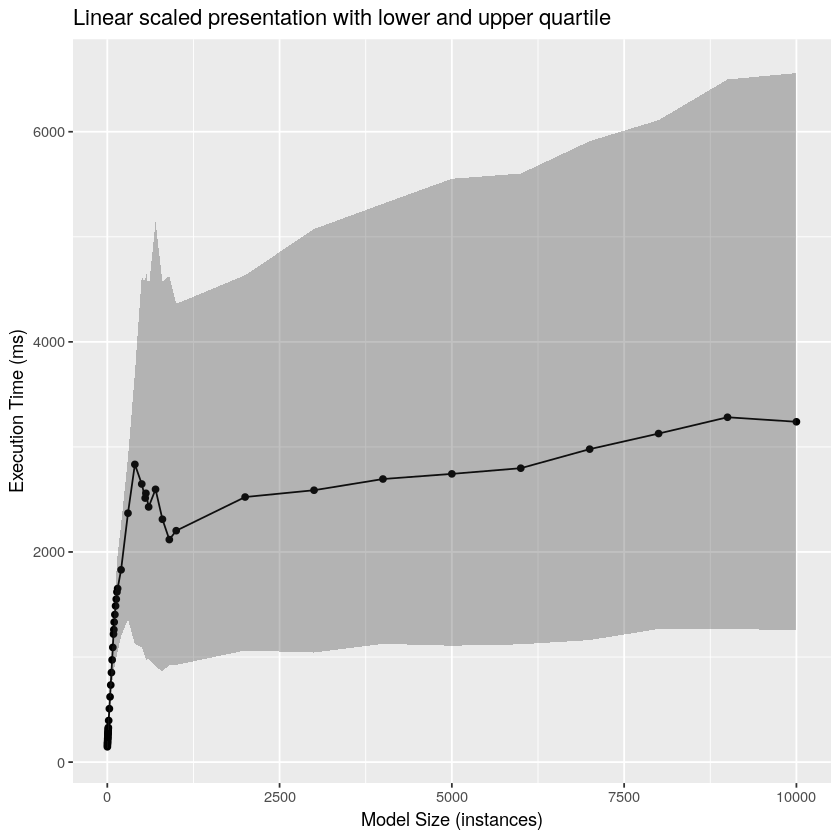

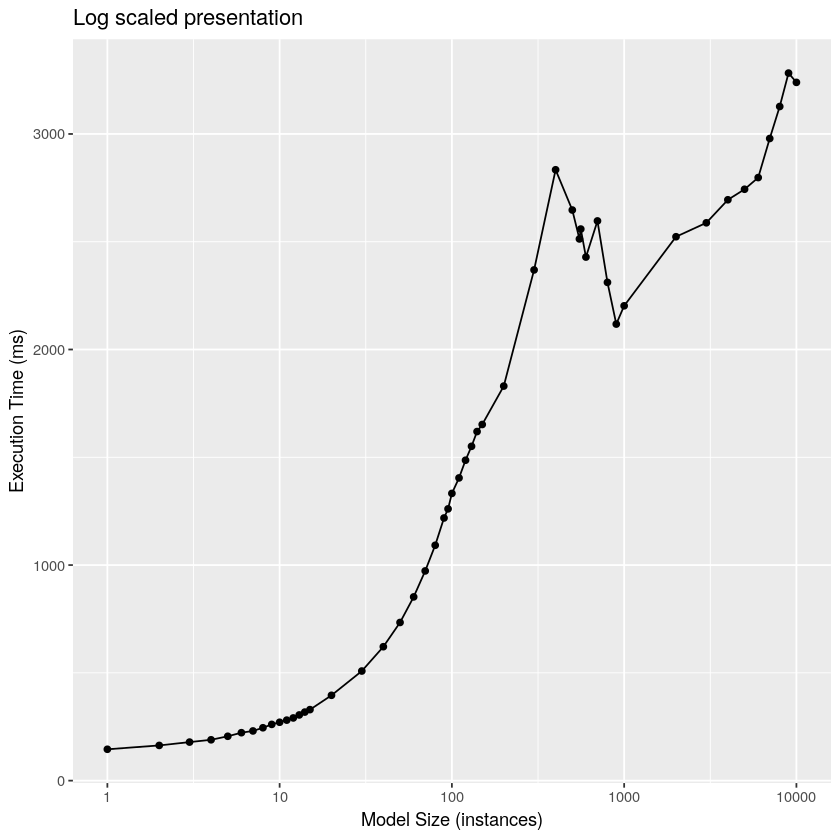

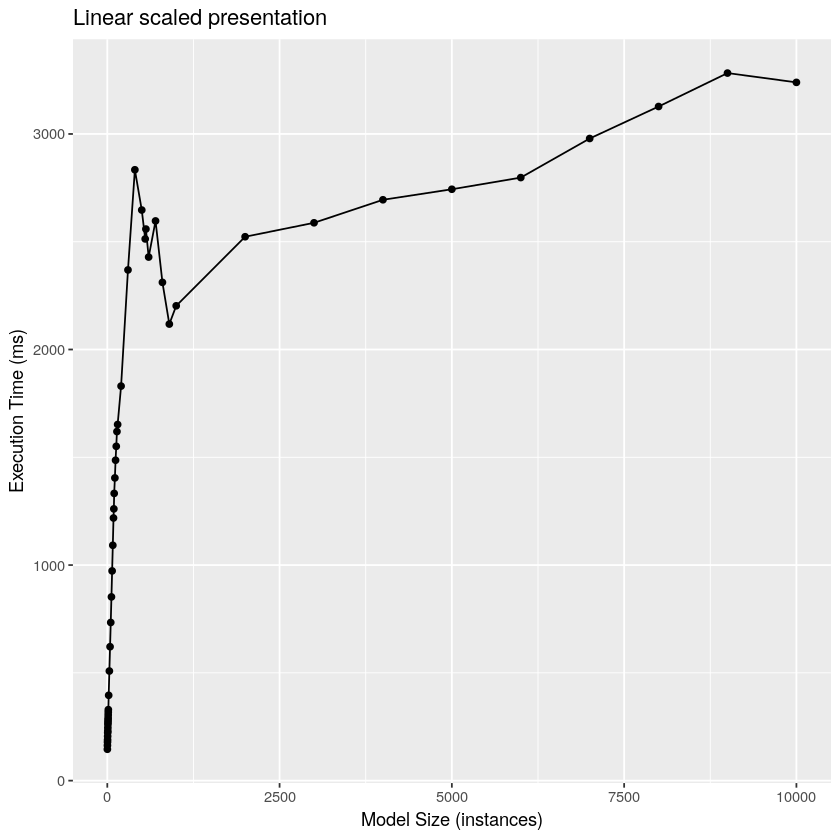

In [12]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

ggplot(data, aes(x=index, y=median)) + 
    scale_x_continuous(trans='log10') +
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    ggtitle("Log scaled presentation with lower and upper quartile") +
    geom_point() + 
    geom_line() + 
    geom_ribbon(data=data, aes(ymin=ql, ymax=qh), alpha=0.3)

ggplot(data, aes(x=index, y=median)) + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    ggtitle("Linear scaled presentation with lower and upper quartile") +
    geom_point() + 
    geom_line() + 
    geom_ribbon(data=data, aes(ymin=ql, ymax=qh), alpha=0.3)

ggplot(data, aes(x=index, y=median)) + 
    scale_x_continuous(trans='log10') +
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    ggtitle("Log scaled presentation") +
    geom_point() + 
    geom_line()

ggplot(data, aes(x=index, y=median)) + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    ggtitle("Linear scaled presentation") +
    geom_point() + 
    geom_line()